In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


##EDA

In [ ]:
df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [ ]:
df.shape

(918, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [ ]:
df['HeartDisease'].value_counts()

,count
HeartDisease,
1,508
0,410


<Axes: xlabel='HeartDisease'>

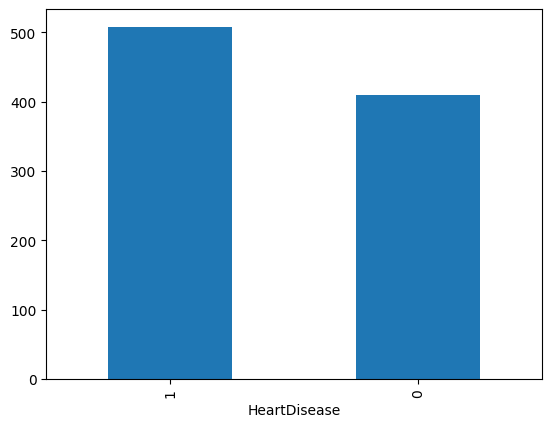

In [ ]:
df['HeartDisease'].value_counts().plot(kind='bar' )

# Now we create histograms which are best to visualize distribution of **Numerical Variables** and identify anamolies if any in our dataset

---



In [ ]:
def numeric_var_plotting(var, num):
  plt.subplot(2,2,num)
  sns.histplot(data = df[var], kde=True)
  plt.tight_layout()

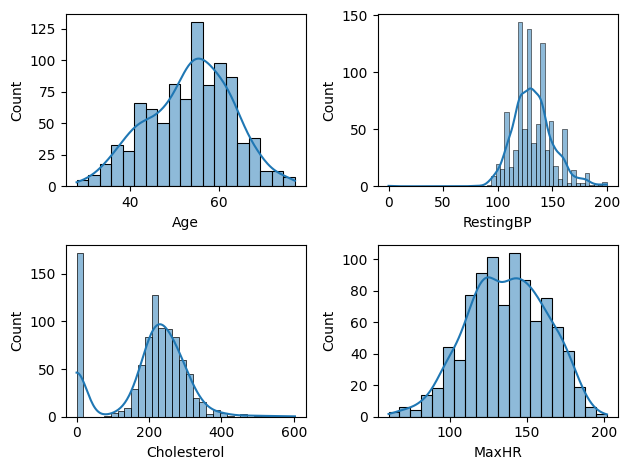

In [ ]:
numeric_var_plotting('Age',1)
numeric_var_plotting('RestingBP',2)
numeric_var_plotting('Cholesterol',3)
numeric_var_plotting('MaxHR',4)


In [ ]:
df['Cholesterol'].value_counts()

,count
Cholesterol,
0,172
254,11
220,10
223,10
204,9
...,...
353,1
278,1
157,1


## We find out that though there were no null or duplicate values find in our dataset, there are still outliers and anamolies present in the datasat such as Cholesterol value as 0 which is not humanly possible.

## We need to perform **data cleaning** to discard these anamolies


---



In [ ]:
ch_mean = df.loc[df['Cholesterol'] != 0,'Cholesterol'].mean()

### Calculate the mean of the 'Cholesterol' column, excluding values that are 0.

### In many medical datasets, a value of 0 may represent missing or invalid data.
### Including such values would distort the true average, so we filter them out first.

### Breakdown:
### 1. df['Cholesterol'] != 0 → Creates a boolean mask to identify non-zero values.
### 2. df.loc[condition, 'Cholesterol'] → Selects only those rows where Cholesterol is not zero.
### 3. .mean() → Calculates the average of the filtered Cholesterol values.

In [ ]:
ch_mean

np.float64(244.6353887399464)

In [ ]:
df['Cholesterol']= df['Cholesterol'].replace(0,ch_mean).round(2)

In [ ]:
resBP_mean = df.loc[df['RestingBP'] != 0, 'RestingBP'].mean()

In [ ]:
df['RestingBP'] = df['RestingBP'].replace(0,resBP_mean).round(2)

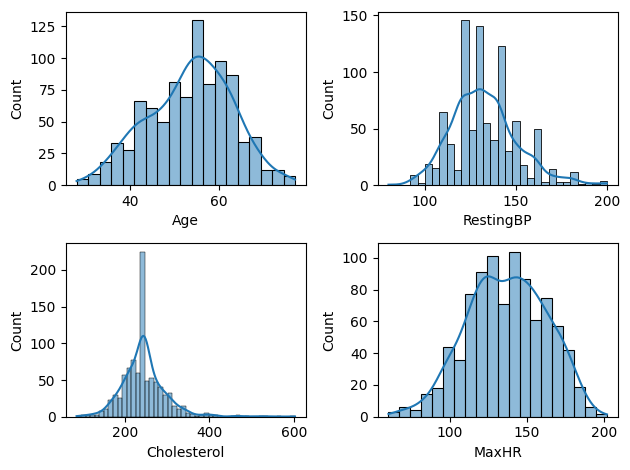

In [ ]:
numeric_var_plotting('Age',1)
numeric_var_plotting('RestingBP',2)
numeric_var_plotting('Cholesterol',3)
numeric_var_plotting('MaxHR',4)


In [ ]:
import sheryanalysis as sher

In [ ]:
sher.analyze(df)


🔍 Basic Analysis Report


INFO:sheryanalysis:
🔍 Basic Analysis Report


------------------------------------------------------------


INFO:sheryanalysis:------------------------------------------------------------


📏 Shape: (918, 12)


INFO:sheryanalysis:📏 Shape: (918, 12)


🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']


INFO:sheryanalysis:🧱 Columns: ['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS', 'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope', 'HeartDisease']



✅ No null values found


INFO:sheryanalysis:
✅ No null values found



🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']


INFO:sheryanalysis:
🔠 Categorical Columns: ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']



🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


INFO:sheryanalysis:
🔢 Numerical Columns: ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


{'shape': (918, 12),
 'columns': ['Age',
  'Sex',
  'ChestPainType',
  'RestingBP',
  'Cholesterol',
  'FastingBS',
  'RestingECG',
  'MaxHR',
  'ExerciseAngina',
  'Oldpeak',
  'ST_Slope',
  'HeartDisease'],
 'dtypes': {'Age': dtype('int64'),
  'Sex': dtype('O'),
  'ChestPainType': dtype('O'),
  'RestingBP': dtype('float64'),
  'Cholesterol': dtype('float64'),
  'FastingBS': dtype('int64'),
  'RestingECG': dtype('O'),
  'MaxHR': dtype('int64'),
  'ExerciseAngina': dtype('O'),
  'Oldpeak': dtype('float64'),
  'ST_Slope': dtype('O'),
  'HeartDisease': dtype('int64')},
 'null_counts': {'Age': 0,
  'Sex': 0,
  'ChestPainType': 0,
  'RestingBP': 0,
  'Cholesterol': 0,
  'FastingBS': 0,
  'RestingECG': 0,
  'MaxHR': 0,
  'ExerciseAngina': 0,
  'Oldpeak': 0,
  'ST_Slope': 0,
  'HeartDisease': 0},
 'total_rows': 918,
 'column_types': {'categorical': ['Sex',
   'ChestPainType',
   'FastingBS',
   'RestingECG',
   'ExerciseAngina',
   'ST_Slope',
   'HeartDisease'],
  'numerical': ['Age', 'Rest

# Now we create countplots which are best to visualize distribution of **Categorical Variables**


---



In [ ]:
def categorical_var_plotting(var_list, hue_column):
    plt.figure(figsize=(8, 3 * len(var_list)))  # Adjust height based on number of plots

    for idx, var in enumerate(var_list, 1):
        plt.subplot(len(var_list), 2, idx)
        sns.countplot(data=df, x=var, hue=df[hue_column])

    plt.tight_layout()


# Line-by-line explanation of the function:

def categorical_var_plotting(var_list, hue_column):
    # Start of the function. It takes two inputs:
    # var_list: a list of categorical column names (e.g., ['Sex', 'ChestPainType'])
    # hue_column: the name of another column (like 'Target')
    used to color the bars differently
    
    plt.figure(figsize=(8, 5 * len(var_list)))
    # Creates a blank figure to hold all subplots.
    # figsize controls the size of the figure. Width is 8, height is
    5 multiplied by number of plots.
    # This ensures that each plot has enough vertical space.

    for idx, var in enumerate(var_list, 1):
        # Loop through each variable in var_list.
        # enumerate(..., 1) means it gives both index (starting from 1)
        and variable name.

        plt.subplot(len(var_list), 1, idx)
        # This creates a subplot (i.e., one section of the full figure)
        where the plot will be drawn.
        # len(var_list): total number of rows of subplots
        # 1: number of columns
        # idx: which subplot position (1st, 2nd, etc.)

        sns.countplot(data=df, x=var, hue=df[hue_column])
        # Creates a countplot (bar chart) using Seaborn.
        # x=var → category to be counted on the x-axis.
        # hue=df[hue_column] → splits bars by hue_column
        (adds different colors).

        plt.title(f'{var} vs {hue_column}')
        # Adds a title above each subplot showing what is being compared.

    plt.tight_layout()
    # Automatically adjusts spacing between subplots
    so they don't overlap.


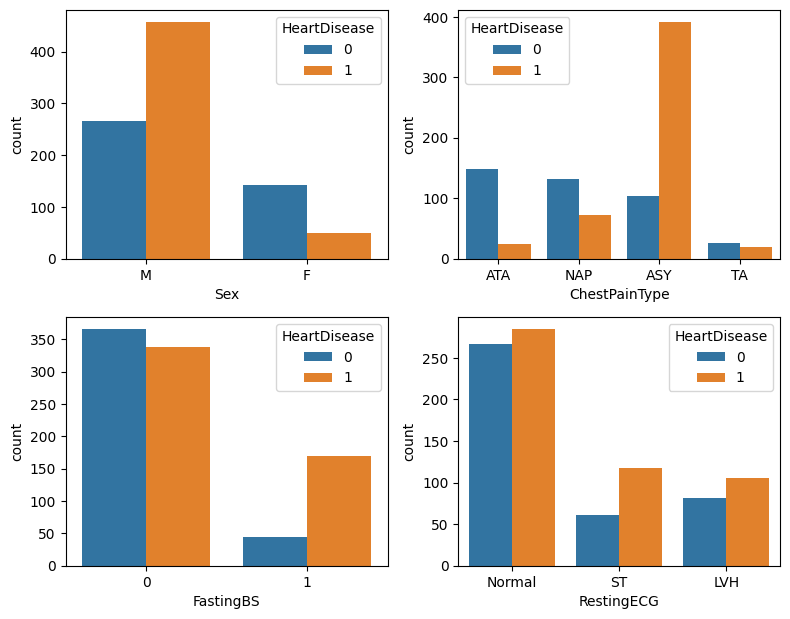

In [ ]:
cat_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG']
categorical_var_plotting(cat_cols, 'HeartDisease')  # HeartDisease is hue column

# Now we will create some **Boxplots** - used to identify relationships between our numerical and categorical variables

---



<Axes: xlabel='HeartDisease', ylabel='Cholesterol'>

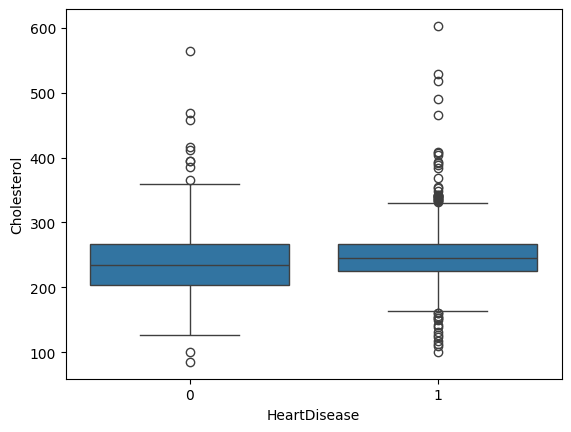

In [ ]:
sns.boxplot(x = 'HeartDisease',y = 'Cholesterol',  data = df)

#🔍 Interpretation of  BoxPlot:
###1. Both groups (0 and 1) have similar median cholesterol levels (around 240–250).

###2. Outliers are present in both groups, indicating some individuals with very high cholesterol.

###3. People with heart disease (1) have slightly lower variability in cholesterol, but the difference is not large.

<Axes: xlabel='HeartDisease', ylabel='Age'>

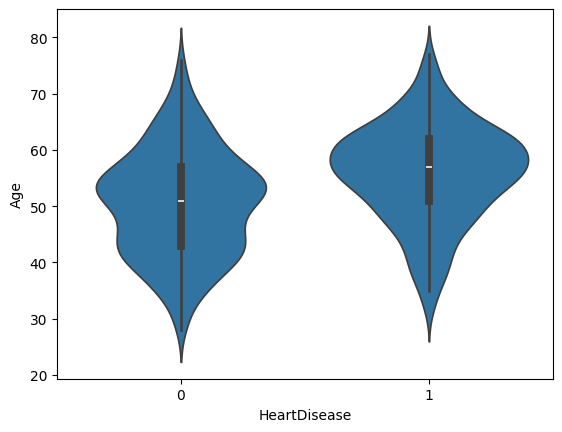

In [ ]:
sns.violinplot(x = 'HeartDisease', y = 'Age', data = df)

##🔍 Key Elements:

```
Thick white dot	- Median age (middle value)

Thick black bar -	Interquartile range (25% to 75%)

Thin vertical line	Whiskers — range of typical values

Width of the violin -	More data points (wider =
                          more frequent values)
```



#🧠 Interpretation:
```
People without heart disease (0):
Median age slightly lower, with more spread in the 40–55 range.


People with heart disease (1):
Median age is slightly higher, and distribution is denser
between ages 50–65.


Both groups have a similar overall age range (~30 to ~80),
 but the distribution shape differs.
```

##💡 Conclusion:

###This plot suggests that people with heart disease tend to be slightly older on average, and their age distribution is more centered in the 50s and 60s. Violin plots help visualize both summary statistics and distribution shape together.

<Axes: >

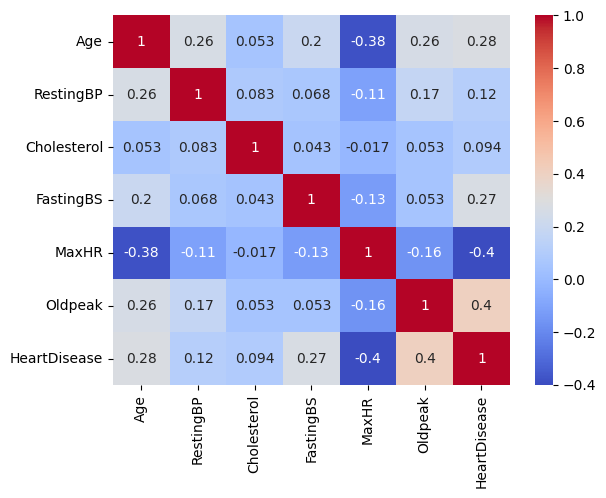

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot = True, cmap = 'coolwarm')

## We will select all columns as they are all kind of correlated with our target output variable i.e Heart Disease

# Data Preprocessing and Feature Scaling

---



In [ ]:
df.head(3)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140.0,289.0,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160.0,180.0,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130.0,283.0,0,ST,98,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    float64
 4   Cholesterol     918 non-null    float64
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 86.2+ KB


In [ ]:
df_encoded = pd.get_dummies(df, drop_first=True) #this scales down categorical vars into 0s and 1s

In [ ]:
df_encoded.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140.0,289.0,0,172,0.0,0,True,True,False,False,True,False,False,False,True
1,49,160.0,180.0,0,156,1.0,1,False,False,True,False,True,False,False,True,False
2,37,130.0,283.0,0,98,0.0,0,True,True,False,False,False,True,False,False,True


In [ ]:
df_encoded= df_encoded.astype(int)

In [ ]:
df_encoded.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0,0,1,1,0,0,0,1,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler() #used for scaling numerical vars

In [ ]:
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_encoded[numerical_cols] = ss.fit_transform(df_encoded[numerical_cols])

In [ ]:
df_encoded.head(3)

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0.414885,0.834754,0,1.382928,-0.727592,0,1,1,0,0,1,0,0,0,1
1,-0.478484,1.527224,-1.210675,0,0.754157,0.282891,1,0,0,1,0,1,0,0,1,0
2,-1.751359,-0.141284,0.722161,0,-1.525138,-0.727592,0,1,1,0,0,0,1,0,0,1


#Model Creation and Evaluation

---



In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [ ]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'KNN': KNeighborsClassifier(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(),
    'SVM': SVC()
}

In [ ]:
import pandas as pd

# Initialize the result list
result = []

# Loop through models, train, predict, and store results
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    result.append({
        'Model': name,
        'Accuracy': round(accuracy, 4),
        'F1 Score': round(f1, 4)
    })

# Convert the result list into a DataFrame
results_df = pd.DataFrame(result)

# Sort by Accuracy in descending order
results_df = results_df.sort_values(by='Accuracy', ascending=False)


In [ ]:
# Reset index to start from 1
results_df.index = range(1, len(results_df) + 1)

# Display
results_df

,Model,Accuracy,F1 Score
1,Logistic Regression,0.8696,0.8857
2,KNN,0.8641,0.8815
3,Naive Bayes,0.8533,0.8683
4,SVM,0.8478,0.8679
5,Decision Tree,0.7609,0.7800


In [281]:
import joblib
joblib.dump(models['Logistic Regression'], "LogisticR_heart.pkl" )
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(X.columns.tolist(), "columns.pkl" )

['columns.pkl']